In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

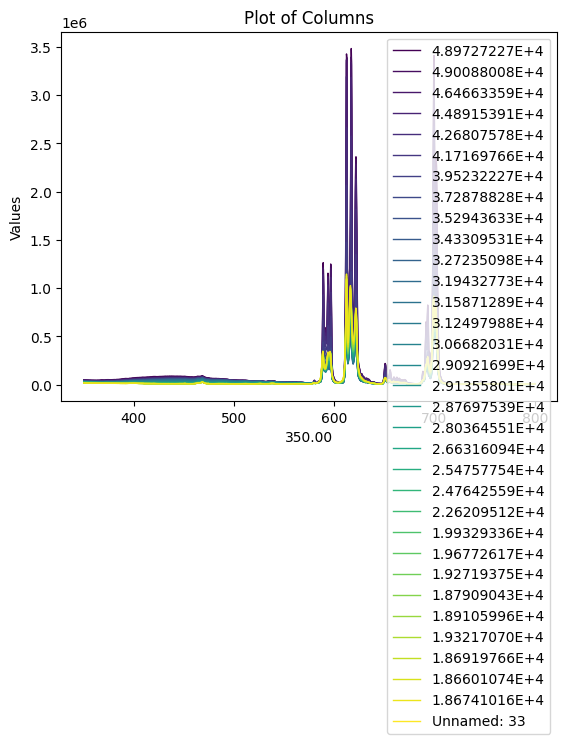

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df = pd.read_csv('em-exc275-10-320-K.txt', skiprows=24)
# Setting up the colormap
colors = cm.viridis(np.linspace(0, 1, len(df.columns) - 1))

# Creating a single plot
plt.figure()

# Plotting each column against column 0
for i, column in enumerate(df.columns[1:]):  # Skip the first column (index 0)
    plt.plot(df[df.columns[0]], df[column], label=column, color=colors[i], linewidth=1.0)

plt.title("Plot of Columns")
plt.xlabel(df.columns[0])  # Label for the x-axis (name of column 0)
plt.ylabel("Values")
plt.legend()  # Show legend
plt.show()  # Display the plot

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def gaussian(x, mu, sigma, area):
    normalization = area / (sigma * np.sqrt(2 * np.pi))
    return normalization * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

In [11]:
def lorentzian(x, mu, gamma, area):
    
    return area / (np.pi) * (gamma) / ((x - mu)**2 + gamma**2)

In [4]:
def convolute_spectral_lines_l(energies, intensities, fwhm, resolution=1000):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    x_min, x_max = min(energies) - 5 * fwhm, max(energies) + 5 * fwhm
    x_values = np.linspace(x_min, x_max, resolution)
    conv_spectrum = np.zeros_like(x_values)

    for energy, intensity in zip(energies, intensities):
        area = intensity  # Assuming intensity is proportional to the desired area
        conv_spectrum += lorentzian(x_values, energy, sigma, area)

    return x_values, conv_spectrum

def convolute_spectral_lines_g(energies, intensities, fwhm, resolution=1000):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    x_min, x_max = min(energies) - 5 * fwhm, max(energies) + 5 * fwhm
    x_values = np.linspace(x_min, x_max, resolution)
    conv_spectrum = np.zeros_like(x_values)

    for energy, intensity in zip(energies, intensities):
        area = intensity  # Assuming intensity is proportional to the desired area
        conv_spectrum += gaussian(x_values, energy, sigma, area)

    return x_values, conv_spectrum

In [5]:
def relative_boltzmann_distribution(x, y, T):

    k = 3.166811563e-6  # Boltzmann constant in a.u./K
    delta_E = y - x   # Energy difference

    return np.exp(-delta_E / (k * T))

In [9]:
np.arange(50, 76, 1)

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75])

In [6]:
import slothpy as slt
#slt.compound_from_molcas('.','Eu_dppmo2_bas2','bas3','.','EuCN_DPPMO2_big_lumi_bas2')


ModuleNotFoundError: No module named 'slothpy'

In [8]:
Eu=slt.compound_from_slt('.','Eu_dppmo2_bas2')

In [18]:
Eu.soc_energies_cm_1('bas3')[36]

5199.6391957234555

In [7]:
with h5py.File("EuCN_DPPMO2_big_lumi_bas2.rassi.h5", "r") as file:
    energies = file["SOS_ENERGIES"][:]
    energies =1e7/(((energies[49]-energies) * 219474.6 ))
energies[:74]
df=pd.DataFrame(energies[:74])
df.to_csv('Eu_dppmo2_SOC')

/tmp/ipykernel_2430656/3673377632.py:3: RuntimeWarning: divide by zero encountered in divide
  energies =1e7/(((energies[49]-energies) * 219474.6 ))


/tmp/ipykernel_2430656/2753203487.py:48: RuntimeWarning: divide by zero encountered in divide
  emission_energies_nm = 1e7/emission_energies_cm


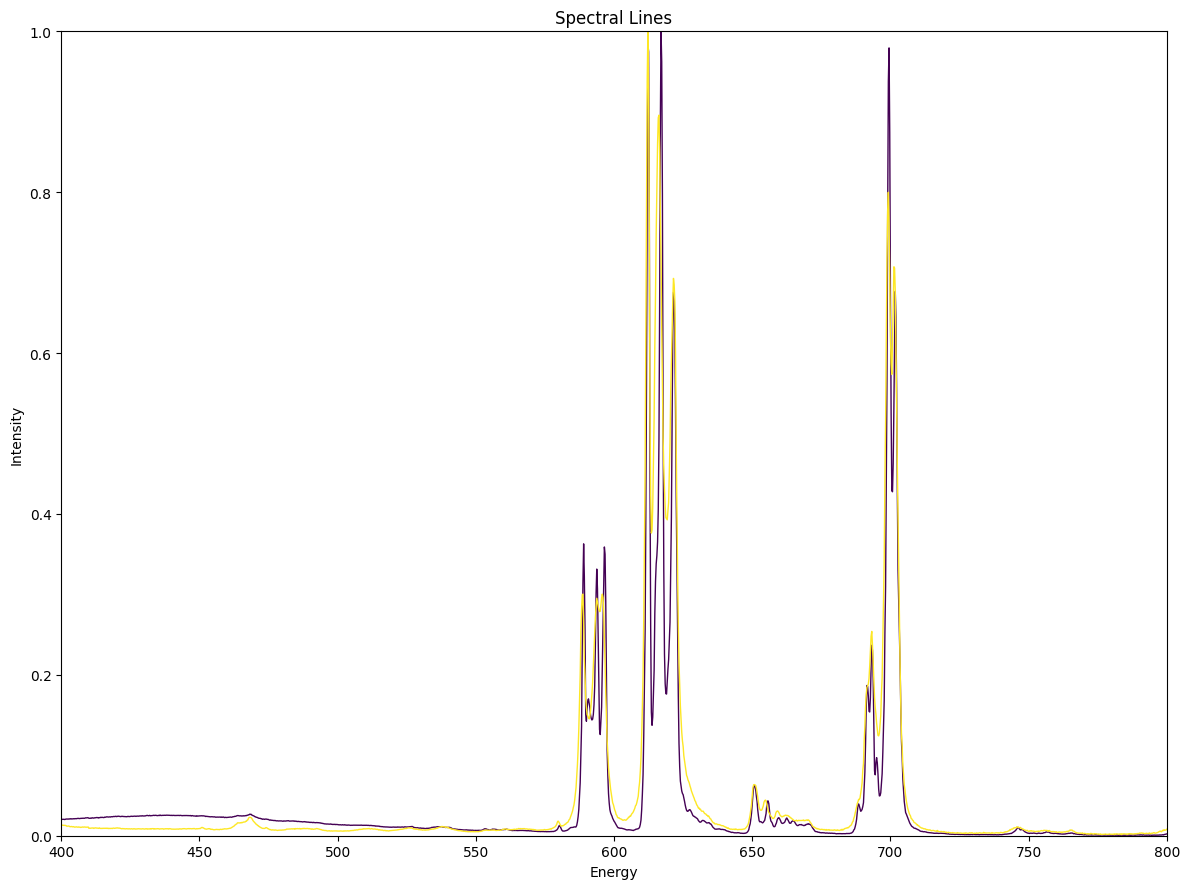

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
# EMISSION
compound_names = ["EuCN_DPPMO2_big_lumi_bas2.rassi.h5"]
F = [ np.arange(49)]#,np.arange(50, 54, 1), np.arange(54, 60, 1), np.arange(60, 68, 1)]
temperatures = np.linspace(10,10, 1)
# scale_factors = [0.69, 0.69, 0.69]
# scale_factors = [0.815, 0.815, 0.815]
# scale_factors = [1., 1., 1.]
fwhm = 20
normalize = 1
resolution = 20000
sum_spectra = np.zeros((resolution, ), dtype=np.float64)
norm = [1, 0.1, 1.2, 0.06]

fig, axs = plt.subplots(1, 1, figsize=(12, 9))
index = 0

results = pd.DataFrame()

# for compound, scale_factor in zip(compound_names, scale_factors):
with h5py.File("EuCN_DPPMO2_big_lumi_bas2.rassi.h5", "r") as file:
    energies = file["SOS_ENERGIES"][:]
    # results = pd.concat([results, pd.Series((energies - energies[0]) * 219474.6, name=f"Original Energies cm-1 {compound}")], axis = 1)
    energies = (energies - energies[0]) * 0.813

    # results = pd.concat([results, pd.Series(energies * 219474.6, name=f"Scaled Energies cm-1 {compound}")], axis = 1)
    dip_mom = file["SOS_EDIPMOM_REAL"][:] + 1j * file["SOS_EDIPMOM_IMAG"][:]
# experimental = np.loadtxt(f"{compound}_lumi_RT_LN.csv", delimiter=',')
# experimental[:,1:] = experimental[:,1:] * normalize
# axs[index].plot(experimental[:,0], experimental[:,1], label={"RT"})
# axs[index].plot(experimental[:,0], experimental[:,2], label={"LN"})
# axs[index].set_title(compound)
# results = pd.concat([results, pd.Series(experimental[:,0], name=f"Wavelength nm experimental {compound}")], axis = 1)
# results = pd.concat([results, pd.Series(experimental[:,1], name=f"Spectra experimental RT {compound}")], axis = 1)
# results = pd.concat([results, pd.Series(experimental[:,2], name=f"Spectra experimental LN {compound}")], axis = 1)
for index, F_emissive in enumerate(F):
    for T in temperatures:    
        intensities = np.zeros((len(F_emissive), 49), dtype = np.float64)
        emission_energies_cm = np.zeros((len(F_emissive), 49), dtype = np.float64)
        for l, level in enumerate(F_emissive):
            for i in range(49):
                for k in range(3):
                    intensities[l,i] += relative_boltzmann_distribution(energies[F_emissive[0]], energies[level], T) * 2/3 * np.abs(dip_mom[k, i, level])**2 * (energies[level] - energies[i])
                    emission_energies_cm[l,i] = ((energies[level] - energies[i]) * 219474.6)
    
        intensities = intensities.flatten()
        emission_energies_cm = emission_energies_cm.flatten()
        intensities = intensities/max(intensities)
        emission_energies_nm = 1e7/emission_energies_cm
        energy_x_cm, spectrum = convolute_spectral_lines_l(emission_energies_cm, intensities, fwhm, resolution)
        spectrum = spectrum/max(spectrum) * norm[index]
        sum_spectra += spectrum
        energy_x_nm = 1e7/energy_x_cm
        # print(spectrum[-600:-300])
        # print(energy_x_nm[-600:-300])
        
        #results = pd.concat([results, pd.Series(emission_energies_nm, name=f"Emission energies nm theory {T} K")], axis = 1)
        results = pd.concat([results, pd.Series(intensities, name=f"Intensities theory {T} K")], axis = 1)
        #results = pd.concat([results, pd.Series(energy_x_nm, name=f"Energy axis nm theory {compound} {T} K")], axis = 1)
        #results = pd.concat([results, pd.Series(spectrum, name=f"Spectra theory {compound} {T} K")], axis = 1)
    
        
        if T == 10:
            axs.vlines(x=emission_energies_nm, ymin=0, ymax=intensities, label="T")
            axs.plot(energy_x_nm, spectrum, label=f'{T}')

#axs.plot(energy_x_nm, sum_spectra)
        

# Adding labels and title
# axs.legend()
axs.set_xlabel('Energy')
axs.set_ylabel('Intensity')
axs.set_title('Spectral Lines')
axs.set_xlim([400, 800])
axs.set_ylim([0,normalize])

df = pd.read_csv('em-exc275-10-320-K.txt', skiprows=24)
# Setting up the colormap
colors = cm.viridis(np.linspace(0, 1, len(df.columns) - 1))

# # Plotting each column against column 0
for i, column in enumerate(df.columns[1:]):  # Skip the first column (index 0)
    axs.plot(df[df.columns[0]], df[df.columns[1]]/df[df.columns[1]].max(), label=column, color=colors[0], linewidth=1.0)
    axs.plot(df[df.columns[0]], df[df.columns[32]]/df[df.columns[32]].max(), label=column, color=colors[32], linewidth=1.0)
    plt.tight_layout()
    plt.show()
    results = pd.concat([results, pd.Series(energy_x_nm, name=f"Energy axis")], axis = 1)
    results = pd.concat([results, pd.Series(spectrum, name=f"Spectra")], axis = 1)

    
#results.to_csv("Emission_Eu2.csv")

[0.         0.0010649  0.00147269 ... 0.73551181 0.73555244 0.85341894]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

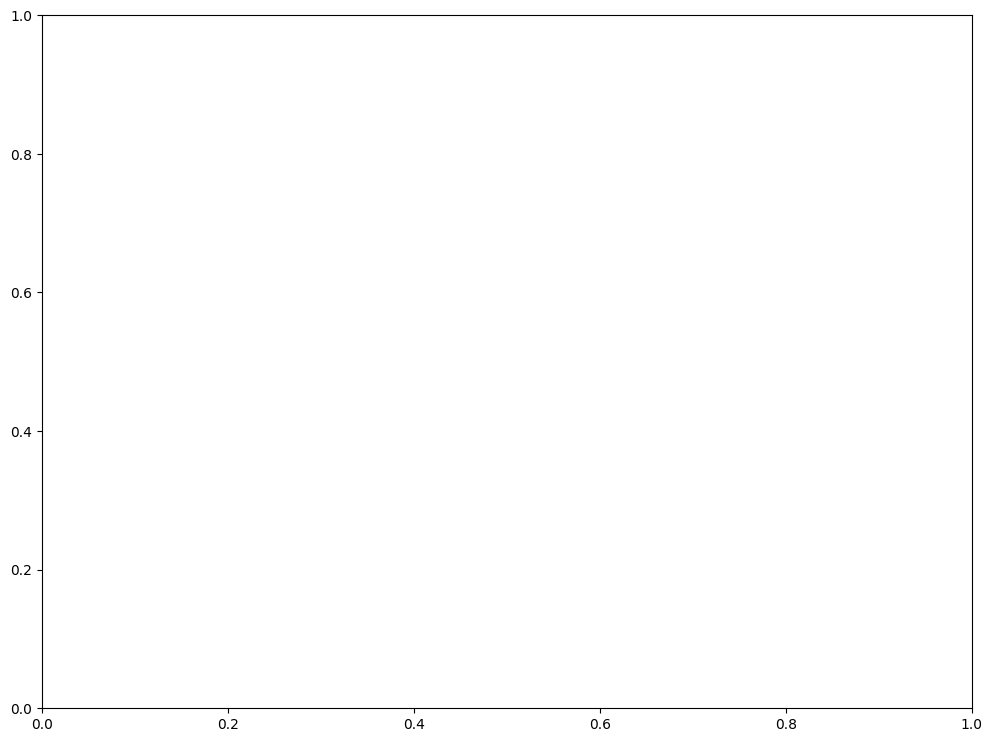

In [14]:
# EMISSION 

compound = ["EuCN_DPPMO2_big_lumi_bas2.rassi.h5"]
F = [[49],np.arange(50, 54, 1), np.arange(54, 60, 1)]#, np.arange(60, 68, 1)]
temperatures = np.linspace(10,10,1)
# scale_factors = [0.69, 0.69, 0.69]
# scale_factors = [0.815, 0.815, 0.815]
# scale_factors = [1., 1., 1.]
fwhm = 20
normalize = 1
resolution = 20000
sum_spectra = np.zeros((resolution, ), dtype=np.float64)
#norm = [1, 0.1, 1.2, 0.06]

fig, axs = plt.subplots(1, 1, figsize=(12, 9))
index = 0

results = pd.DataFrame()

# for compound, scale_factor in zip(compound_names, scale_factors):
with h5py.File("EuCN_DPPMO2_big_lumi_bas2.rassi.h5", "r") as file:
    energies = file["SOS_ENERGIES"][:]
    # results = pd.concat([results, pd.Series((energies - energies[0]) * 219474.6, name=f"Original Energies cm-1 {compound}")], axis = 1)
    energies = (energies - energies[0]) * 0.813
    print(energies)

    # results = pd.concat([results, pd.Series(energies * 219474.6, name=f"Scaled Energies cm-1 {compound}")], axis = 1)
    dip_mom = file["SOS_EDIPMOM_REAL"][:] + 1j * file["SOS_EDIPMOM_IMAG"][:]
# experimental = np.loadtxt(f"{compound}_lumi_RT_LN.csv", delimiter=',')
# experimental[:,1:] = experimental[:,1:] * normalize
# axs[index].plot(experimental[:,0], experimental[:,1], label={"RT"})
# axs[index].plot(experimental[:,0], experimental[:,2], label={"LN"})
# axs[index].set_title(compound)
# results = pd.concat([results, pd.Series(experimental[:,0], name=f"Wavelength nm experimental {compound}")], axis = 1)
# results = pd.concat([results, pd.Series(experimental[:,1], name=f"Spectra experimental RT {compound}")], axis = 1)
# results = pd.concat([results, pd.Series(experimental[:,2], name=f"Spectra experimental LN {compound}")], axis = 1)
for index, F_emissive in enumerate(F):
    for T in temperatures:    
        intensities = np.zeros((len(F_emissive), 49), dtype = np.float64)
        emission_energies_cm = np.zeros((len(F_emissive), 49), dtype = np.float64)
        oscillator_strength=np.zeros((len(F_emissive), 49), dtype = np.float64)
    
        for l, level in enumerate(F_emissive):
            for i in range(49):
                for k in range(3):
                    oscillator_strength[l,i]+= 2/3 * np.abs(dip_mom[k, i, level])**2 * (energies[level] - energies[i])
                    intensities[l,i] += relative_boltzmann_distribution(energies[F_emissive[0]], energies[level], T) * 2/3 * np.abs(dip_mom[k, i, level])**2 * (energies[level] - energies[i])
                    r=relative_boltzmann_distribution(energies[F_emissive[0]], energies[level], T)
                    emission_energies_cm[l,i] = ((energies[level] - energies[i]) * 219474.6)
                    
    
        
        intensities = intensities.flatten()
        emission_energies_cm = emission_energies_cm#.flatten()
        intensities = intensities/max(intensities)
        
        emission_energies_nm = 1e7/emission_energies_cm
        energy_x_cm, spectrum = convolute_spectral_lines_l(emission_energies_cm, intensities, fwhm, resolution)
        spectrum = spectrum/max(spectrum) 
        sum_spectra += spectrum
        energy_x_nm = 1e7/energy_x_cm
        # print(spectrum[-600:-300])
        #print(energy_x_cm[-600:-300])
       # print( emission_energies_cm)
        #results = pd.concat([results, pd.Series(emission_energies_nm, name=f"Emission energies nm theory {T} K")], axis = 1)
        results = pd.concat([results, pd.Series(intensities, name=f"Intensities theory {T} K")], axis = 1)
        #results = pd.concat([results, pd.Series(energy_x_nm, name=f"Energy axis nm theory {compound} {T} K")], axis = 1)
        #results = pd.concat([results, pd.Series(spectrum, name=f"{T} K")], axis = 1)
#print(energy_x_nm)
    
        
        
        if T == 10:
        
           axs.vlines(x=emission_energies_nm, ymin=0, ymax=intensities, label="T")
axs.plot(energy_x_nm, spectrum, label=f'{T}')

#axs.plot(energy_x_nm, sum_spectra)
import csv


with open ("Intensities_Eu_D1.csv",'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(['energy','intensity'])
    for i in range(len(emission_energies_nm)):
        csvwriter.writerow([emission_energies_nm[i],intensities[i]])
        

# Adding labels and title
# axs.legend()
axs.set_xlabel('Energy')
axs.set_ylabel('Intensity')
axs.set_title('Spectral Lines')
axs.set_xlim([400, 900])
axs.set_ylim([0,normalize])

#df = pd.read_csv('em-exc275-10-320-K.txt', skiprows=24)
# Setting up the colormap
#colors = cm.viridis(np.linspace(0, 1, len(df.columns) - 1))

# # Plotting each column against column 0
#for i, column in enumerate(df.columns[1:]):  # Skip the first column (index 0)
#axs.plot(df[df.columns[0]], df[df.columns[1]]/df[df.columns[1]].max(), label=column, color=colors[0], linewidth=1.0)
# axs.plot(df[df.columns[0]], df[df.columns[32]]/df[df.columns[32]].max(), label=column, color=colors[32], linewidth=1.0)
#plt.tight_layout()
#plt.show()
#results = pd.concat([results, pd.Series(energy_x_nm, name=f"Energy axis")], axis = 1)
#results = pd.concat([results, pd.Series(spectrum, name=f"Spectra")], axis = 1)

#results.to_csv("Intensities_Eu_D0.csv")
#df=pd.DataFrame(energy_x_nm)
#df.to_csv("energy_D0")
df=pd.DataFrame(emission_energies_nm)
df.to_csv('energie_lumi_Eu')

In [20]:
(oscillator_strength/1e-11).round(4)


array([[6.07110e+00, 1.99000e-02, 2.75000e-02, 8.60000e-03, 1.98640e+00,
        2.84930e+00, 2.61730e+00, 2.46500e-01, 1.18070e+00, 8.85100e-01,
        2.45700e-01, 3.75700e-01, 1.94400e-01, 2.00000e-03, 8.59000e-02,
        7.19000e-02, 1.22617e+01, 1.34937e+01, 2.13915e+01, 1.07928e+01,
        1.28000e+00, 6.97634e+01, 3.85904e+01, 6.41790e+00, 2.80630e+00,
        3.70600e-01, 5.07800e-01, 8.13300e-01, 6.08000e-02, 3.06000e-02,
        5.73000e-02, 1.12300e-01, 5.47000e-02, 3.46000e-02, 1.20200e-01,
        1.68000e-02, 1.58583e+01, 1.64655e+01, 1.00115e+01, 5.23610e+00,
        5.53490e+00, 8.11200e-01, 4.64130e+00, 2.29850e+00, 1.85200e+00,
        6.15600e-01, 4.09800e-01, 7.44000e-02, 2.02800e-01]])

In [21]:

df=pd.DataFrame((oscillator_strength/1e-11).round(4)).transpose()
df.to_csv('oscillator_strength')

In [ ]:
emission_energies_cm

In [ ]:
temperatures = np.linspace(10,320, 32)
temperatures

In [ ]:
import numpy as np

np.arange(49)

In [ ]:
np.arange(50,54,1)

In [22]:
energie=[]
inten=[]
with open('Eu_dppmo2_fnal_SOC.rtf','r') as f:
    for line in f:
        liczby1=[]
        liczby=line.split()
        print(liczby)
        for i in liczby:
            liczby1.append((i.replace(',','.')))
        
        energie.append(1e7/float(liczby1[0]))
        inten.append(float(liczby1[1]))

energie

['580,24098', '0,02611']
['590,08396', '0,25678']
['593,94215', '0,35428']
['596,49385', '0,11057']
['614,89314', '0,62641']
['617,01089', '0,89853']
['618,89292', '0,82536']
['621,20132', '0,07773']
['621,86578', '0,37234']
['653,84851', '0,06344']
['654,4097', '0,01761']
['654,54073', '0,02693']
['655,57142', '0,01393']
['656,11218', '1,42241E-4']
['657,18427', '0,00616']
['658,17912', '0,00515']
['698,07366', '0,17576']
['700,73063', '0,19342']
['701,76683', '0,30663']
['702,9111', '0,15471']
['704,18491', '0,01835']
['705,52896', '1']
['707,31858', '0,55316']
['708,51115', '0,092']
['709,31377', '0,04023']
['758,95847', '0,00531']
['759,28412', '0,00728']
['762,01298', '0,01166']
['763,08887', '8,71557E-4']
['765,44115', '4,38108E-4']
['767,10046', '8,21152E-4']
['769,3849', '0,00161']
['770,07694', '7,84606E-4']
['770,21688', '4,96104E-4']
['771,5315', '0,00172']
['771,86711', '2,4096E-4']


[17234.21878957946,
 16946.740934967966,
 16836.656566637004,
 16764.63219193291,
 16262.988395024215,
 16207.169374271498,
 16157.883984195521,
 16097.840873873223,
 16080.640423726163,
 15294.062534454655,
 15280.947088651039,
 15277.888054422525,
 15253.868144526496,
 15241.296084459216,
 15216.432371395622,
 15193.432450424742,
 14325.135831654212,
 14270.819016431464,
 14249.747312793339,
 14226.550128458633,
 14200.815521593611,
 14173.762619184336,
 14137.90091587867,
 14114.103920594614,
 14098.133185825505,
 13175.951511549769,
 13170.300466708035,
 13123.136038968785,
 13104.633540258554,
 13064.36164295583,
 13036.102207525726,
 12997.395711821222,
 12985.715427344181,
 12983.356064593132,
 12961.233598368957,
 12955.598017384105]

In [ ]:
def convolute_spectral_lines_l(energies, intensities, fwhm, resolution=1000):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    x_min, x_max = min(energies) - 5 * fwhm, max(energies) + 5 * fwhm
    x_values = np.linspace(x_min, x_max, resolution)
    conv_spectrum = np.zeros_like(x_values)

    for energy, intensity in zip(energies, intensities):
        area = intensity  # Assuming intensity is proportional to the desired area
        conv_spectrum += lorentzian(x_values, energy, sigma, area)

    return x_values, conv_spectrum

def convolute_spectral_lines_g(energies, intensities, fwhm, resolution=1000):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    x_min, x_max = min(energies) - 5 * fwhm, max(energies) + 5 * fwhm
    x_values = np.linspace(x_min, x_max, resolution)
    conv_spectrum = np.zeros_like(x_values)

    for energy, intensity in zip(energies, intensities):
        area = intensity  # Assuming intensity is proportional to the desired area
        conv_spectrum += gaussian(x_values, energy, sigma, area)

    return x_values, conv_spectrum

In [32]:

energy,spectrum=convolute_spectral_lines_l(energie,inten,30,1000)
spectrum = spectrum/max(spectrum)


In [33]:
df=pd.DataFrame(spectrum)
df.to_csv('spectrum_Eu_lumi')
df2=pd.DataFrame(energy)
df2.to_csv('energy_Eu_lumi')